## Title: "Predicting Comprehensive Knowledge about HIV/AIDS using a Machine Learning Approach"

In [1]:
#Importing the Required libraries
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
#pip install sklearn_lvq
from sklearn_lvq import GlvqModel
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings

# Example: Suppress all warnings of a specific type, such as UserWarning
warnings.simplefilter(action='ignore', category=UserWarning)


In [3]:
# Read the data


df, meta = pyreadstat.read_dta('D:\\AAU PHDS\\Semister Three\\Advanced Data Analytics\\Proposal\hiv.dta')

#df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mv012          3465 non-null   int64  
 1   mv025          3465 non-null   int64  
 2   mv101          3465 non-null   int64  
 3   mv102          3465 non-null   int64  
 4   mv103          3465 non-null   int64  
 5   mv106          3465 non-null   int64  
 6   mv157          3465 non-null   int64  
 7   mv158          3465 non-null   int64  
 8   mv159          3465 non-null   int64  
 9   mv190          3465 non-null   int64  
 10  mv201          3465 non-null   int64  
 11  mv323a         583 non-null    object 
 12  mv463a         3465 non-null   int64  
 13  mv463c         3465 non-null   int64  
 14  mv501          3465 non-null   int64  
 15  mv502          3465 non-null   int64  
 16  mv505          1824 non-null   object 
 17  mv511          1963 non-null   object 
 18  mv512   

In [5]:
# To specifically identify object (string) or categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical or Object columns:", categorical_columns)

Categorical or Object columns: Index(['mv323a', 'mv505', 'mv511', 'mv512', 'mv754bp', 'mv754cp', 'mv754dp',
       'mv754jp', 'mv754wp', 'mv775', 'mv777', 'mv778', 'mv781'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns excluding the date columns
object_columns = [col for col in df.select_dtypes(include='object').columns]
print("Object columns excluding date columns:", object_columns)

# Initialize the LabelEncoder
label_encoders = {}

# Apply Label Encoding to each object column (excluding date columns)
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nDataFrame after Label Encoding:")
df

Object columns excluding date columns: ['mv323a', 'mv505', 'mv511', 'mv512', 'mv754bp', 'mv754cp', 'mv754dp', 'mv754jp', 'mv754wp', 'mv775', 'mv777', 'mv778', 'mv781']

DataFrame after Label Encoding:


,mv012,mv025,mv101,mv102,mv103,mv106,mv157,mv158,mv159,mv190,...,mv754cp,mv754dp,mv754jp,mv754wp,mv775,mv777,mv778,mv781,sm109,hiv_knowledge
0,19,2,5,2,3,1,2,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
1,27,2,5,2,3,1,2,3,1,1,...,1,1,1,1,0,1,1,1,1,0.0
2,16,2,5,2,3,1,2,3,0,1,...,1,1,1,1,1,0,0,0,1,0.0
3,47,2,5,2,3,1,0,3,1,2,...,0,1,0,0,0,0,1,1,1,0.0
4,16,2,5,2,3,1,0,2,0,2,...,1,1,1,1,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,23,2,5,2,3,1,0,3,2,1,...,1,1,1,1,1,0,1,1,1,0.0
3461,19,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
3462,23,2,5,2,3,2,0,3,2,2,...,1,1,1,1,1,1,1,0,3,0.0
3463,21,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,1,1,1,1,0.0


In [7]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
missing_values

mv012             0
mv025             0
mv101             0
mv102             0
mv103             0
mv106             0
mv157             0
mv158             0
mv159             0
mv190             0
mv201             0
mv323a            0
mv463a            0
mv463c            0
mv501             0
mv502             0
mv505             0
mv511             0
mv512             0
mv525             0
mv536             0
mv750             0
mv751             0
mv754bp           0
mv754cp           0
mv754dp           0
mv754jp           0
mv754wp           0
mv775             0
mv777             0
mv778             0
mv781             0
sm109             0
hiv_knowledge    16
dtype: int64

In [8]:
# Check unique values in 'hiv_knowledge' column to see if there are unexpected representations of missing data
df['hiv_knowledge'].unique()

array([ 0.,  1., nan])

In [9]:
# Drop rows where 'hiv_knowledge' is NaN
df = df.dropna(subset=['hiv_knowledge'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3449 entries, 0 to 3464
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mv012          3449 non-null   int64  
 1   mv025          3449 non-null   int64  
 2   mv101          3449 non-null   int64  
 3   mv102          3449 non-null   int64  
 4   mv103          3449 non-null   int64  
 5   mv106          3449 non-null   int64  
 6   mv157          3449 non-null   int64  
 7   mv158          3449 non-null   int64  
 8   mv159          3449 non-null   int64  
 9   mv190          3449 non-null   int64  
 10  mv201          3449 non-null   int64  
 11  mv323a         3449 non-null   int32  
 12  mv463a         3449 non-null   int64  
 13  mv463c         3449 non-null   int64  
 14  mv501          3449 non-null   int64  
 15  mv502          3449 non-null   int64  
 16  mv505          3449 non-null   int32  
 17  mv511          3449 non-null   int32  
 18  mv512        

In [11]:
df

,mv012,mv025,mv101,mv102,mv103,mv106,mv157,mv158,mv159,mv190,...,mv754cp,mv754dp,mv754jp,mv754wp,mv775,mv777,mv778,mv781,sm109,hiv_knowledge
0,19,2,5,2,3,1,2,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
1,27,2,5,2,3,1,2,3,1,1,...,1,1,1,1,0,1,1,1,1,0.0
2,16,2,5,2,3,1,2,3,0,1,...,1,1,1,1,1,0,0,0,1,0.0
3,47,2,5,2,3,1,0,3,1,2,...,0,1,0,0,0,0,1,1,1,0.0
4,16,2,5,2,3,1,0,2,0,2,...,1,1,1,1,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,23,2,5,2,3,1,0,3,2,1,...,1,1,1,1,1,0,1,1,1,0.0
3461,19,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
3462,23,2,5,2,3,2,0,3,2,2,...,1,1,1,1,1,1,1,0,3,0.0
3463,21,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,1,1,1,1,0.0


In [12]:
#  numerical columns

numerical_columns = df.select_dtypes(include=['number']).columns

 ##Impute numerical variables with mean
for col in numerical_columns:
    mean_value = df[col].mean()  # Calculate the mean
    df.loc[:, col] = df[col].fillna(mean_value)  

In [13]:
df

,mv012,mv025,mv101,mv102,mv103,mv106,mv157,mv158,mv159,mv190,...,mv754cp,mv754dp,mv754jp,mv754wp,mv775,mv777,mv778,mv781,sm109,hiv_knowledge
0,19,2,5,2,3,1,2,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
1,27,2,5,2,3,1,2,3,1,1,...,1,1,1,1,0,1,1,1,1,0.0
2,16,2,5,2,3,1,2,3,0,1,...,1,1,1,1,1,0,0,0,1,0.0
3,47,2,5,2,3,1,0,3,1,2,...,0,1,0,0,0,0,1,1,1,0.0
4,16,2,5,2,3,1,0,2,0,2,...,1,1,1,1,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,23,2,5,2,3,1,0,3,2,1,...,1,1,1,1,1,0,1,1,1,0.0
3461,19,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
3462,23,2,5,2,3,2,0,3,2,2,...,1,1,1,1,1,1,1,0,3,0.0
3463,21,2,5,2,3,1,0,3,2,2,...,1,1,1,1,1,1,1,1,1,0.0


In [14]:
# Step 1: Extract desired column names from the dictionary
desired_columns = list(meta.column_names_to_labels.keys())

# Step 2: Filter df_cleaned columns (exclude 'hiv_knowledge')
filtered_columns = [col for col in df if col in desired_columns]

# Step 3: Create a new DataFrame with filtered columns
df_filtered = df[filtered_columns]

# Rename columns using the labels from the meta dictionary
df_filtered.rename(columns=meta.column_names_to_labels, inplace=True)

# Print the filtered DataFrame
print("Filtered DataFrame:")
df_filtered.head()

Filtered DataFrame:


,current age - respondent,type of place of residence,region,type of place of residence,childhood place of residence,highest educational level,frequency of reading newspaper or magazine,frequency of listening to radio,frequency of watching television,wealth index,...,reduce chances of aids by always using condoms during sex,reduce chance of aids: have 1 sex partner with no oth partner,get aids from mosquito bites,get aids by sharing food with person who has aids,knows someone who has or died of aids,allowed to keep aids infection secret,willing to care for relative with aids,ever been tested for aids,highest educational level,Comprehensive Knowledge about HIV/AIDS
0,19,2,5,2,3,1,2,3,2,2,...,1,1,1,1,1,0,1,1,1,0.0
1,27,2,5,2,3,1,2,3,1,1,...,1,1,1,1,0,1,1,1,1,0.0
2,16,2,5,2,3,1,2,3,0,1,...,1,1,1,1,1,0,0,0,1,0.0
3,47,2,5,2,3,1,0,3,1,2,...,0,1,0,0,0,0,1,1,1,0.0
4,16,2,5,2,3,1,0,2,0,2,...,1,1,1,1,1,1,0,0,1,0.0


In [15]:
# Check for duplicate columns
duplicate_columns = df_filtered.columns[df_filtered.T.duplicated()]
print(f"Duplicate columns: {list(duplicate_columns)}")


Duplicate columns: ['type of place of residence', 'ever heard of aids']


In [16]:
# Drop duplicate columns
df = df_filtered.loc[:, ~df_filtered.T.duplicated()]

In [17]:
df

,current age - respondent,type of place of residence,region,childhood place of residence,highest educational level,frequency of reading newspaper or magazine,frequency of listening to radio,frequency of watching television,wealth index,total children ever born,...,reduce chances of aids by always using condoms during sex,reduce chance of aids: have 1 sex partner with no oth partner,get aids from mosquito bites,get aids by sharing food with person who has aids,knows someone who has or died of aids,allowed to keep aids infection secret,willing to care for relative with aids,ever been tested for aids,highest educational level,Comprehensive Knowledge about HIV/AIDS
0,19,2,5,3,1,2,3,2,2,0,...,1,1,1,1,1,0,1,1,1,0.0
1,27,2,5,3,1,2,3,1,1,1,...,1,1,1,1,0,1,1,1,1,0.0
2,16,2,5,3,1,2,3,0,1,0,...,1,1,1,1,1,0,0,0,1,0.0
3,47,2,5,3,1,0,3,1,2,24,...,0,1,0,0,0,0,1,1,1,0.0
4,16,2,5,3,1,0,2,0,2,0,...,1,1,1,1,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,23,2,5,3,1,0,3,2,1,2,...,1,1,1,1,1,0,1,1,1,0.0
3461,19,2,5,3,1,0,3,2,2,0,...,1,1,1,1,1,0,1,1,1,0.0
3462,23,2,5,3,2,0,3,2,2,0,...,1,1,1,1,1,1,1,0,3,0.0
3463,21,2,5,3,1,0,3,2,2,0,...,1,1,1,1,1,1,1,1,1,0.0


C:\Users\1221\AppData\Local\Temp\ipykernel_19736\476197995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hiv_knowledge_counts.index, y=hiv_knowledge_counts.values, palette="viridis")


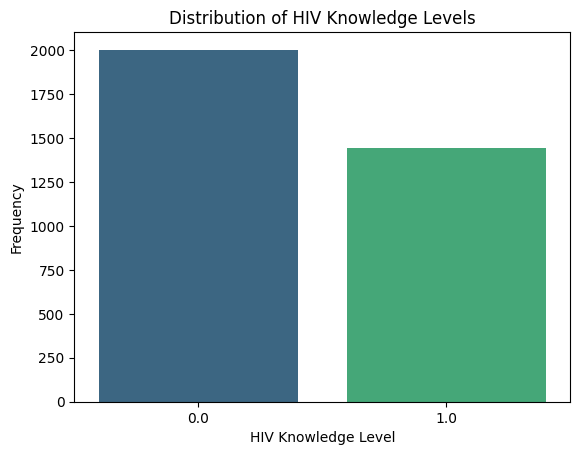

In [18]:
# Count occurrences of each category in 'hiv_knowledge'
hiv_knowledge_counts = df['Comprehensive Knowledge about HIV/AIDS'].value_counts()

# Create a barplot
sns.barplot(x=hiv_knowledge_counts.index, y=hiv_knowledge_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("HIV Knowledge Level")
plt.ylabel("Frequency")
plt.title("Distribution of HIV Knowledge Levels")
plt.show()

In [19]:
# Step 1: Extract features (X) and target (y)
X = df_filtered.drop(columns=['Comprehensive Knowledge about HIV/AIDS'])  # Drop 'hiv_knowledge' from features
y = df_filtered['Comprehensive Knowledge about HIV/AIDS']  # Target is the 'hiv_knowledge' column

In [20]:
# Step 2: Split into training and test set (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2759, 33)
X_test shape: (690, 33)
y_train shape: (2759,)
y_test shape: (690,)


In [21]:
# Step 3: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the resampled datasets
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")

X_train_resampled shape: (3204, 33)
y_train_resampled shape: (3204,)


In [22]:
# ---------- Logistic Regression ----------
# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

# Apply GridSearchCV with 5-fold cross-validation for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters and cross-validation score for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"[Logistic Regression]_lr: Best Hyperparameters: {best_params_lr}")
print(f"[Logistic Regression]_lr: Best Cross-Validation Accuracy: {best_score_lr:.4f}")

# Evaluate Logistic Regression on the test set
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print("[Logistic Regression]_lr: Classification Report:")
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Logistic Regression]_lr: Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
[Logistic Regression]_lr: Best Cross-Validation Accuracy: 0.9232
[Logistic Regression]_lr: Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       401
         1.0       0.97      0.83      0.90       289

    accuracy                           0.92       690
   macro avg       0.93      0.91      0.92       690
weighted avg       0.93      0.92      0.92       690



In [23]:
# ---------- Random Forest Classifier ----------
# Define the random forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV with 5-fold cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and cross-validation score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"[Random Forest]_rm: Best Hyperparameters: {best_params_rf}")
print(f"[Random Forest]_rm: Best Cross-Validation Accuracy: {best_score_rf:.4f}")

# Evaluate Random Forest on the test set
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

print("[Random Forest]_rm: Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Random Forest]_rm: Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
[Random Forest]_rm: Best Cross-Validation Accuracy: 0.9659
[Random Forest]_rm: Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       401
         1.0       1.00      0.94      0.97       289

    accuracy                           0.97       690
   macro avg       0.98      0.97      0.97       690
weighted avg       0.98      0.97      0.97       690



C:\Users\1221\AppData\Local\Temp\ipykernel_19736\2677868698.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


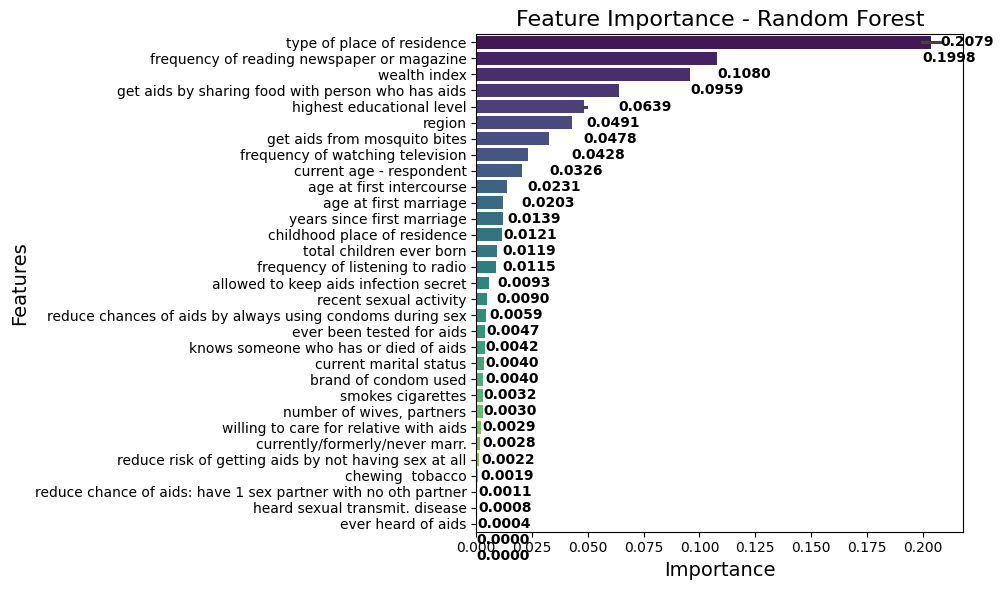

In [24]:
# Extract feature importances from the Random Forest model
feature_importances = best_model_rf.feature_importances_

# Create a DataFrame to hold the feature importances

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use the column names of X_train
    'Importance': feature_importances
})

# Sort the DataFrame by 'Importance' in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Annotate feature importance values on the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', color='black', fontweight='bold')

# Add titles and labels
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# ---------- Gradient Boosting ----------

# Define the Gradient Boosting model
gboost_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
}

# Apply GridSearchCV with 5-fold cross-validation for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gboost_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters and cross-validation score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"[Gradient Boosting] Best Hyperparameters: {best_params_gb}")
print(f"[Gradient Boosting] Best Cross-Validation Accuracy: {best_score_gb:.4f}")

# Evaluate Gradient Boosting on the test set
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)

print("[Gradient Boosting] Classification Report:")
print(classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[Gradient Boosting] Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
[Gradient Boosting] Best Cross-Validation Accuracy: 0.9768
[Gradient Boosting] Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       401
         1.0       1.00      0.97      0.98       289

    accuracy                           0.99       690
   macro avg       0.99      0.98      0.99       690
weighted avg       0.99      0.99      0.99       690



C:\Users\1221\AppData\Local\Temp\ipykernel_19736\954735677.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


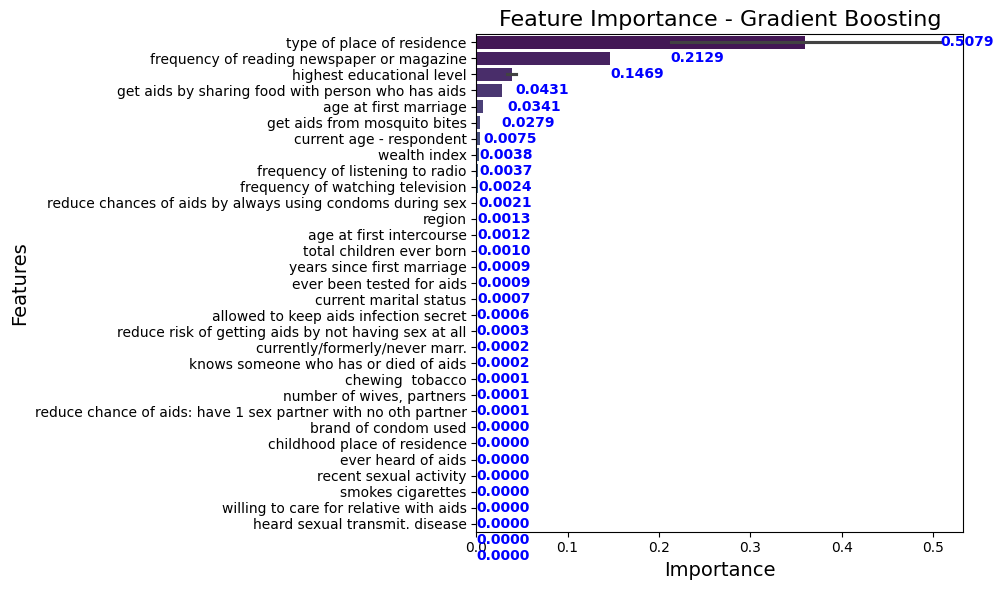

In [26]:
# Fit the Gradient Boosting model
gboost_model = GradientBoostingClassifier(random_state=42)
gboost_model.fit(X_train_resampled, y_train_resampled)

# Extract feature importances from the Gradient Boosting model
feature_importances = gboost_model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,  # Use the column names of X_train
    'Importance': feature_importances
})

# Sort the DataFrame by 'Importance' in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Annotate feature importance values on the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', color='blue', fontweight='bold')

# Add titles and labels
plt.title('Feature Importance - Gradient Boosting', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

# ---------- Decision Tree Classifier ----------
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Split criteria
    'max_depth': [10, 20, 30],    # Depth of the tree
    'min_samples_split': [2, 5],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for best split
    #'splitter': ['best', 'random']     # Strategy used to split at each node
}

# Apply GridSearchCV with 5-fold cross-validation for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters and cross-validation score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"[Decision Tree]_rm: Best Hyperparameters: {best_params_dt}")
print(f"[Decision Tree]_rm: Best Cross-Validation Accuracy: {best_score_dt:.4f}")

# Evaluate Decision Tree on the test set
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

print("[Decision Tree]_rm: Classification Report:")
print(classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Decision Tree]_rm: Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
[Decision Tree]_rm: Best Cross-Validation Accuracy: 0.9601
[Decision Tree]_rm: Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       401
         1.0       1.00      0.92      0.96       289

    accuracy                           0.97       690
   macro avg       0.97      0.96      0.96       690
weighted avg       0.97      0.97      0.96       690



In [28]:
# ---------- Multilayer Perceptron (MLP) ----------
# Define the MLP model
mlp_model = MLPClassifier(max_iter=50, random_state=42)

# Hyperparameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001]
}

# Apply GridSearchCV with 5-fold cross-validation for MLP
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train, y_train)

# Best hyperparameters and cross-validation score for MLP
best_params_mlp = grid_search_mlp.best_params_
best_score_mlp = grid_search_mlp.best_score_

print(f"[MLP]_mlp: Best Hyperparameters: {best_params_mlp}")
print(f"[MLP]_mlp: Best Cross-Validation Accuracy: {best_score_mlp:.4f}")

# Evaluate MLP on the test set
best_model_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_model_mlp.predict(X_test)

print("[MLP]_mlp: Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[MLP]_mlp: Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
[MLP]_mlp: Best Cross-Validation Accuracy: 0.9061
[MLP]_mlp: Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       401
         1.0       0.99      0.82      0.90       289

    accuracy                           0.92       690
   macro avg       0.94      0.91      0.92       690
weighted avg       0.93      0.92      0.92       690



In [32]:
from nbconvert import HTMLExporter
import nbformat

# Load your notebook
with open("D:\\AAU PHDS\\Semister Three\\Advanced Data Analytics\\Proposal\\HIV-Knowledge-Status\\notebook\\preprocessing.ipynb") as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
body, resources = html_exporter.from_notebook_node(notebook_content)

# Save HTML to a file
with open("HIV.html", "w") as f:
    f.write(body)